
# **TP : CNN (LeNet, VGG, ResNet) **   
**Objectif** : Comprendre l'entraînement et l'évaluation de **trois architectures CNN classiques** (*LeNet, VGG, ResNet*) sur le dataset (**CIFAR-10**).

## **🔹 Partie 1 : Préparation des Données**
Vous allez utiliser le dataset **CIFAR-10**.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 84s 0us/step


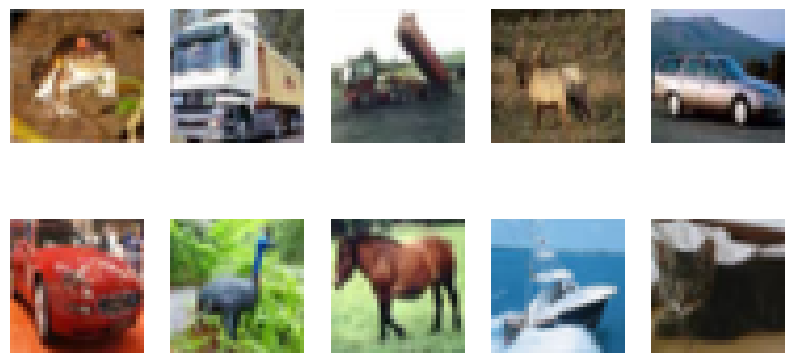

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Charger le dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalisation des images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Encodage des labels en one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Afficher quelques images du dataset
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.axis("off")
plt.show()


## **🔹 Partie 2 : Implémentation du modèle LeNet-5**

In [2]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_lenet():
    model = Sequential([
        Conv2D(6, (5,5), activation='relu', input_shape=(32,32,3)),
        MaxPooling2D(pool_size=(2,2)),
        # TO-DO: Ajoutez une deuxième couche Conv2D et une couche MaxPooling2D ici !
        Conv2D(16, (5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

lenet = create_lenet()
lenet.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
lenet.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

## **🔹 Partie 3 : Implémentation du modèle VGG-16**

Développé par **l’Université d’Oxford**, **VGG-16** utilise des **petits filtres 3×3** pour empiler plusieurs couches.

### **Pourquoi VGG-16 ?**
- Meilleure extraction de caractéristiques grâce à **plusieurs convolutions empilées**.
- Apporte une **meilleure généralisation** que LeNet.

📌 **Architecture :**
- **Plusieurs blocs de convolutions (3×3) + MaxPooling**
- **3 couches Dense en sortie**

**Inconvénient** : **Très coûteux en calcul**.

In [3]:

from tensorflow.keras.applications import VGG16

def create_vgg():
    model = VGG16(include_top=True, weights=None, input_shape=(32,32,3), classes=10)
    return model

vgg = create_vgg()
vgg.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │       2,101,248 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 33,638,218 (128.32 MB)

 Trainable params: 33,638,218 (128.32 MB)

 Non-trainable params: 0 (0.00 B)

## **🔹 Partie 4 : Implémentation du modèle ResNet-50**

In [4]:

from tensorflow.keras.applications import ResNet50

def create_resnet():
    model = ResNet50(weights=None, input_shape=(32,32,3), classes=10)
    return model

resnet = create_resnet()
resnet.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 23,555,082 (89.86 MB)

 Non-trainable params: 53,120 (207.50 KB)


**Vu le grand nombre de paramètres dans ResNet-50, transformez-le en ResNet-18 en conservant la même structure d’architecture :**

Définition manuelle de ResNet-18 en Keras
ResNet-18 est une version plus légère de ResNet-50. Vous pouvez le construire manuellement en utilisant des Blocs Basiques (Basic Blocks) au lieu des Blocs Goulot d'étranglement (Bottleneck Blocks) utilisés dans ResNet-50.

🔹 Structure de ResNet-18 :

Moins de couches que ResNet-50
Utilise des Blocs Basiques (2 convolutions par bloc) au lieu des Blocs Goulot d’étranglement (3 convolutions par bloc).

In [5]:
from tensorflow.keras import layers, models

def residual_block(x, filters):
    """ Basic Residual Block (2 conv layers) """
    shortcut = x
    x = layers.Conv2D(filters, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters, (3,3), padding='same')(x)

    # Add shortcut connection
    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)

    return x

def create_resnet18(input_shape=(224,224,3), num_classes=10):
    """ Custom ResNet-18 model """
    inputs = layers.Input(shape=input_shape)

    # Conv2D with strides=2 and padding='same' and activation='relu'
    x = Conv2D(64, (7, 7), strides=2, padding='same', activation='relu')(inputs)
    # MaxPooling2D 3*3 with strides=2 and padding='same'
    x = layers.MaxPooling2D((3,3), strides=2, padding='same')(x)

    # 4 Residual Blocks
    for _ in range(2):
        x = residual_block(x, 64)
    x = layers.MaxPooling2D((2,2))(x)

    # Classification Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation="softmax")(x)

    model = models.Model(inputs, x)
    return model

resnet18 = create_resnet18()
resnet18.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
resnet18.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 112, 112, 64)   │          9,472 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 56, 56, 64)     │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 56, 56, 64)     │              0 │ conv2d_4[0][0],        │
│                           │                        │                │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 56, 56, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 56, 56, 64)     │              0 │ conv2d_6[0][0],        │
│                           │                        │                │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 56, 56, 64)     │              0 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 28, 28, 64)     │              0 │ re_lu_1[0][0]          │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 64)             │              0 │ max_pooling2d_3[0][0]  │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 10)             │            650 │ global_average_poolin… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 157,834 (616.54 KB)

 Trainable params: 157,834 (616.54 KB)

 Non-trainable params: 0 (0.00 B)

## **🔹 Partie 5 : Entraînement des modèles**

In [6]:

models = {"LeNet": lenet, "VGG": vgg, "ResNet18": resnet18}

history = {}

for name, model in models.items():
    print(f"Entraînement du modèle {name}...")
    history[name] = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)


Entraînement du modèle LeNet...
Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3049 - loss: 1.8914 - val_accuracy: 0.4347 - val_loss: 1.5460
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4653 - loss: 1.4719 - val_accuracy: 0.5000 - val_loss: 1.3796
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5163 - loss: 1.3457 - val_accuracy: 0.5323 - val_loss: 1.3011
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5539 - loss: 1.2460 - val_accuracy: 0.5360 - val_loss: 1.2926
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5740 - loss: 1.1925 - val_accuracy: 0.5771 - val_loss: 1.1885
Entraînement du modèle VGG...
Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 61s 123ms/step - accuracy: 0.1003 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 57s 80ms/step - accuracy: 0.1006 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 

ValueError: Input 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 32, 32, 3)

In [ ]:
# ✏️ : Tâche : Modifiez le nombre d'époques, la taille du batch et le taux d'apprentissage, puis observez leur impact sur les performances.
#      batch_size = 256  # Default: 128
#      num_epochs = 10   # Default: 5

### CODE HERE ###

models = {"LeNet": lenet, "VGG": vgg, "ResNet18": resnet18}

history = {}

for name, model in models.items():
    print(f"Entraînement du modèle {name}...")
    history[name] = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=256)

## **🔹 Partie 6 : Évaluation et Comparaison**

In [ ]:
for name, model in models.items():
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"{name} - Accuracy : {test_acc:.2f}")


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Convertir les probabilités en classes prédictes (en prenant la classe avec la probabilité maximale --> np.argmax)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir les étiquettes réelles en classes (en prenant l'index des classes)
y_true = np.argmax(y_test, axis=1)

# Générer le rapport de classification avec précision, rappel et F1-score
report = classification_report(y_true, y_pred_classes)

print(report)

## **🔹 Partie 7 : Analyse des Résultats**

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

for name, hist in history.items():
    plt.plot(hist.history["val_accuracy"], label=name)

plt.title("Comparaison des modèles")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()
